In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


1. average number of cars during noon hour drive-up window follows Poisson distribution with a mean of 2. chart distribution. What is the probability that no cars drive up(.pmf)? .135 What is the probability that 3 or more cars drive up(.sf)? .32 How likely is it that at least 1 drives through(.sf)? .865

In [4]:
lamb = 2

car_dist = stats.poisson(lamb)

<function matplotlib.pyplot.show(close=None, block=None)>

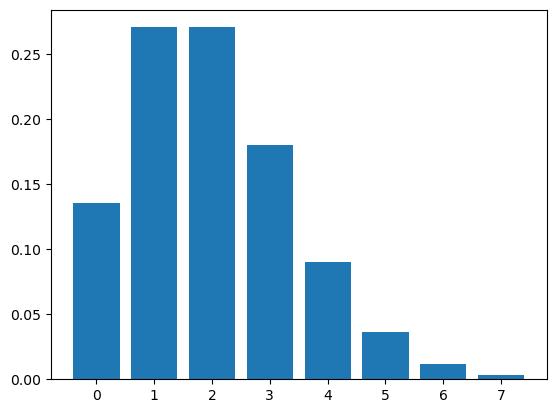

In [29]:
x = np.arange(0,8)
y = stats.poisson(lamb).pmf(x)

plt.bar(x,y)

plt.show

In [7]:
car_dist.pmf(0)

0.1353352832366127

In [8]:
car_dist.sf(2)

0.32332358381693654

In [30]:
car_dist.sf(0)

0.8646647167633873

2. a. grades distributed with mean of 3.0 and SD of .3. 

a. What gpa is required to be in the top 5% of class(.isf)? 3.49

In [11]:
mean = 3.0
sd = .3

grade_dist = stats.norm(mean,sd)


In [12]:
grade_dist.isf(.05)

3.4934560880854417

b. What GPA constitutes bottom 15% of class(.ppf)? 2.69

In [13]:
grade_dist.ppf(.15)

2.689069983151863

c. Determine range for 3rd decile. Does a person with 2.8 GPA fall within this? 

In [22]:
bottom = grade_dist.ppf(21)

top = grade_dist.ppf(30)
top


nan

In [31]:
range_of_grades = grade_dist.ppf([.2, .3])
range_of_grades

array([2.74751363, 2.84267985])

d. What percentile is a GPA of 3.5? 

In [32]:
grade_dist.cdf(3.5)

0.9522096477271853

3. Website has click-through rate of 2%. How likely is 4326 visitors with 97 click-throughs(.pmf)? .0219

In [23]:
n_visitors = 4326
p_of_clicks = .02

In [24]:
website_dist = stats.binom(n_visitors, p_of_clicks)

In [36]:
website_dist.sf(96)

0.13975823631416448

4. homework has 100 questions where all answers are a probability rounded to hundreths place. Given random answers to each question, what is the probability of 1 of first 60 answers being correct(.sf)? .45

In [26]:
n_questions = 60
p_of_correct = .01

In [27]:
homework_dist = stats.binom(n_questions, p_of_correct)

In [37]:
homework_dist.sf(0)

0.45284335760923855

5. 3% chance that student will clean break area. 90% of 66 students visit each day. 

a. how likely is it that the break area will be cleaned in a day?

In [40]:
n = round(.9 * 3 * 22)
p = .03

stats.binom(n, p).sf(0)

0.8342199288437352

b. how likely is it that 2 day go without getting cleaned?

In [41]:
stats.binom(n * 2, p).pmf(0)

0.027483031992576134

c. How likely is it that a week will pass with no cleaning?

In [42]:
stats.binom(n * 5, p).pmf(0)

0.00012521651388091245

6. # of people in line. Mean is 15 and SD is 3. It takes 2 minutes to order and 10 minutes to get food. What is the likelihood that you have 15 minutes to eat food within 60 minute lunch period? 

In [43]:
mean = 15 * 2
sd = 3 * 2

#(60- 15- 10 -2 = 33)
time_dist = stats.norm(mean,sd)
time_dist.cdf(33)


0.6914624612740131

7. connect to employees database. Find average salary and SD. Use normal distribution to model these salaries and then compare to the dataset. 

In [ ]:
import pandas as pd
import env

url = env.get_db_url
query = '''
SELECT *
FROM salaries s
WHERE s.to_date > NOW()
'''


salaries = pd.read_sql(query,url)

a. What percent of employees earn less than 60000?

In [ ]:
mean = salaries.saraly.mean()
SD = salaries.salary.std()

stats.norm(mean, SD).cdf(60000)

b. what percent earn more than 95000

In [ ]:
stats.norm(mean, SD).sf(95000)

c. what percent earn between 65000 and 80000

In [ ]:
np.diff(stats.norm(mean, SD).cdf([65000, 80000]))

d. what do top 5% of employees make? 

In [ ]:
stats.norm(mean, SD).isf(0.05)